# Wine quality prediction using Multiple Linear Regression

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
# Reading the data
wine_data = pd.read_csv('winequality-white.csv', sep =';')
wine_data = wine_data[1:]
wine_data= pd.DataFrame(wine_data, columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])

In [42]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6
10,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.000000,5


In [44]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000
mean,6.854758,0.278243,0.334186,6.388493,0.045773,35.306106,138.354196,0.994026,3.188305,0.489855,10.514617,5.877884
std,0.843952,0.100805,0.121032,5.068451,0.021850,17.008310,42.499999,0.002990,0.150992,0.114136,1.230502,0.885727
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


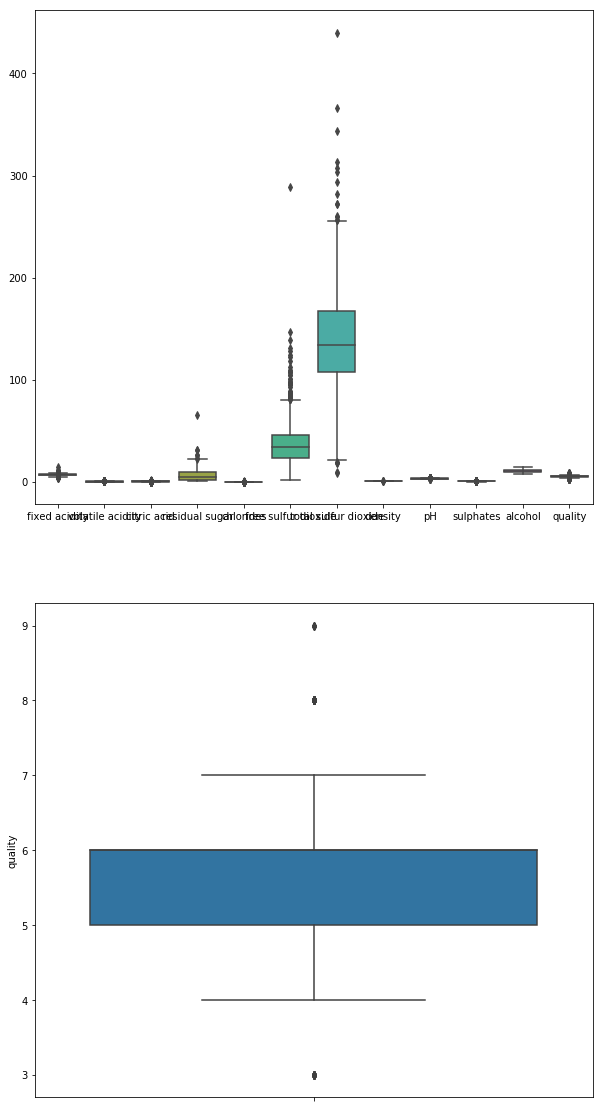

In [49]:
# Distribution
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=wine_data,orient="v",ax=axes[0])
sn.boxplot(data=wine_data,y="quality",orient="pH",ax=axes[1])

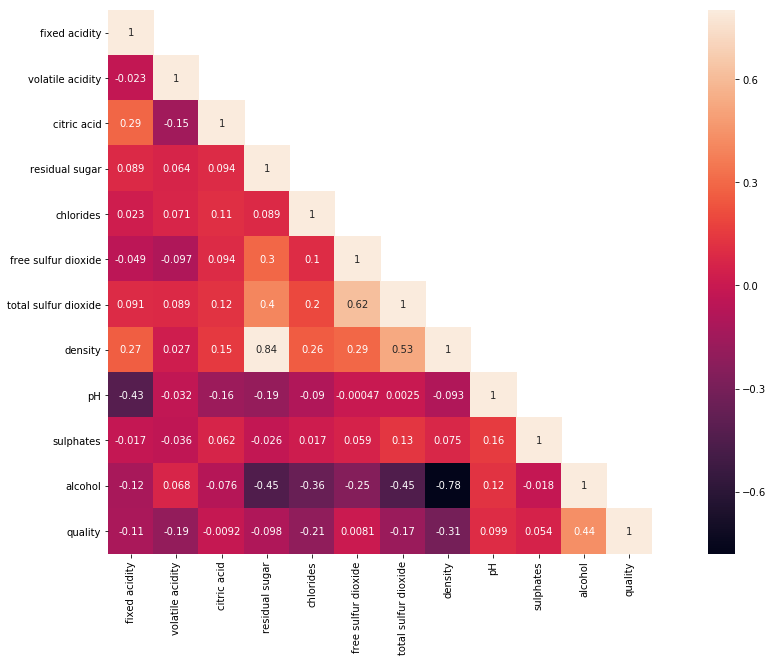

In [47]:
# Correlation analysis
corrMatt = wine_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [54]:
#separating dependent and independent variables
X = wine_data.iloc[:, :-1]
y = wine_data.iloc[:, -1]

In [55]:
# Adding extra Columnt
X = np.append(arr = np.ones((X.shape[0], 1)), values = X, axis = 1)

In [56]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
# Linear regressiong
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

r2_score(y_test, predictions)

0.2534858899777517

In [59]:
# Backwards elimination
import statsmodels.formula.api as sm
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:03:13   Log-Likelihood:                -5542.9
No. Observations:                4897   AIC:                         1.111e+04
Df Residuals:                    4885   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.2647     18.806      7.990      0.000     113.397     187.133
x1             0.0656      0.021      3.144      0.002       0.025       0.107
x2            -1.8629      0.114    -16.370      0.000      -2.086      -1.640
x3             0.0221      0.096      0.231      0.817      -0.166       0.210
x4             0.0815      0.008     10.821      0.000       0.067       0.096
x5            -0.2453      0.547     -0.449      0.654      -1.317       0.826
x6             0.0037      0.001      4.422      0.000       0.002       0.005
x7            -0.0003      0.000     -0.754      0.451      -0.001       0.000
x8          -150.3596     19.076     -7.882      0.000    -187.758    -112.962
x9             0.6871      0.105      6.520      0.000       0.481       0.894
x10            0.6317      0.100      6.292      0.000       0.435       0.828
x11            0.1934      0.024      7.985      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.223   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.771
Skew:                           0.073   Prob(JB):                     2.13e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Backwards elimination
import statsmodels.formula.api as sm
X_opt = X[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:04:20   Log-Likelihood:                -5543.0
No. Observations:                4897   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.118e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.9725     18.761      7.994      0.000     113.192     186.753
x1             0.0662      0.021      3.197      0.001       0.026       0.107
x2            -1.8675      0.112    -16.664      0.000      -2.087      -1.648
x3             0.0814      0.008     10.823      0.000       0.067       0.096
x4            -0.2318      0.543     -0.426      0.670      -1.297       0.834
x5             0.0037      0.001      4.434      0.000       0.002       0.005
x6            -0.0003      0.000     -0.745      0.456      -0.001       0.000
x7          -150.0615     19.031     -7.885      0.000    -187.370    -112.753
x8             0.6851      0.105      6.524      0.000       0.479       0.891
x9             0.6326      0.100      6.307      0.000       0.436       0.829
x10            0.1939      0.024      8.043      0.000       0.147       0.241
==============================================================================
Omnibus:                      114.104   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.515
Skew:                           0.073   Prob(JB):                     2.42e-55
Kurtosis:                       4.101   Cond. No.                     3.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Backwards elimination
import statsmodels.formula.api as sm
X_opt = X[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:05:40   Log-Likelihood:                -5543.1
No. Observations:                4897   AIC:                         1.111e+04
Df Residuals:                    4887   BIC:                         1.117e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3155     18.494      8.182      0.000     115.059     187.572
x1             0.0676      0.020      3.308      0.001       0.028       0.108
x2            -1.8714      0.112    -16.757      0.000      -2.090      -1.652
x3             0.0820      0.007     11.144      0.000       0.068       0.096
x4             0.0037      0.001      4.423      0.000       0.002       0.005
x5            -0.0003      0.000     -0.751      0.453      -0.001       0.000
x6          -151.4610     18.744     -8.080      0.000    -188.208    -114.714
x7             0.6930      0.103      6.701      0.000       0.490       0.896
x8             0.6340      0.100      6.325      0.000       0.438       0.831
x9             0.1939      0.024      8.043      0.000       0.147       0.241
==============================================================================
Omnibus:                      114.228   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.855
Skew:                           0.073   Prob(JB):                     2.04e-55
Kurtosis:                       4.101   Cond. No.                     3.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Backwards elimination
import statsmodels.formula.api as sm
X_opt = X[:, [0, 1, 2, 4, 6, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:05:56   Log-Likelihood:                -5543.3
No. Observations:                4897   AIC:                         1.110e+04
Df Residuals:                    4888   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.1579     18.102      8.516      0.000     118.671     189.645
x1             0.0682      0.020      3.338      0.001       0.028       0.108
x2            -1.8878      0.110    -17.237      0.000      -2.103      -1.673
x3             0.0828      0.007     11.365      0.000       0.069       0.097
x4             0.0034      0.001      4.952      0.000       0.002       0.005
x5          -154.3459     18.345     -8.413      0.000    -190.311    -118.381
x6             0.6949      0.103      6.723      0.000       0.492       0.898
x7             0.6287      0.100      6.288      0.000       0.433       0.825
x8             0.1931      0.024      8.018      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.260   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.400
Skew:                           0.075   Prob(JB):                     2.57e-55
Kurtosis:                       4.100   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

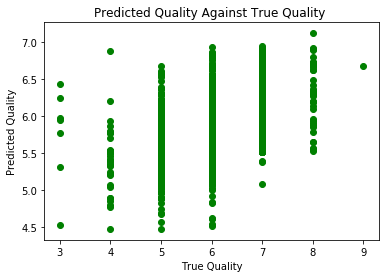

In [65]:
# Displaying the results
plt.scatter(y_test, predictions, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()